In [1]:
# Description: This program uses three exponential moving averages to predict stock price movement

In [2]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [4]:
# store stock data
df = pd.read_csv('Data/TSLA.csv')

# set index by date
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000


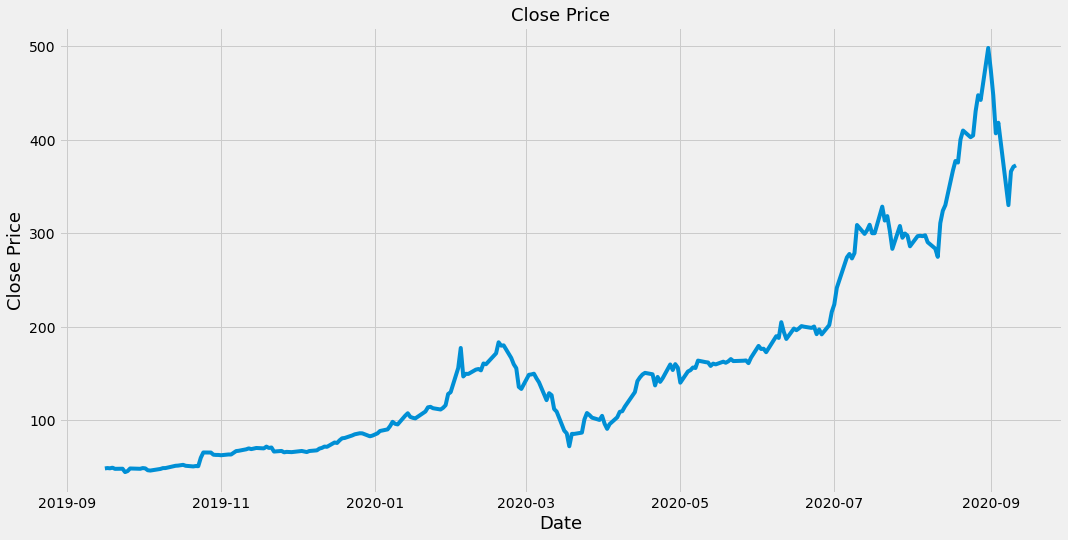

In [5]:
# visually show the close price
plt.figure(figsize=(16,8))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [6]:
# calculate the 3 moving averages
# calculate the fast EMA
shortEMA = df.Close.ewm(span=5, adjust = False).mean()
# calculate the middle EMA
middleEMA = df.Close.ewm(span=21, adjust = False).mean()
# calculate the long EMA
longEMA = df.Close.ewm(span=60, adjust = False).mean()

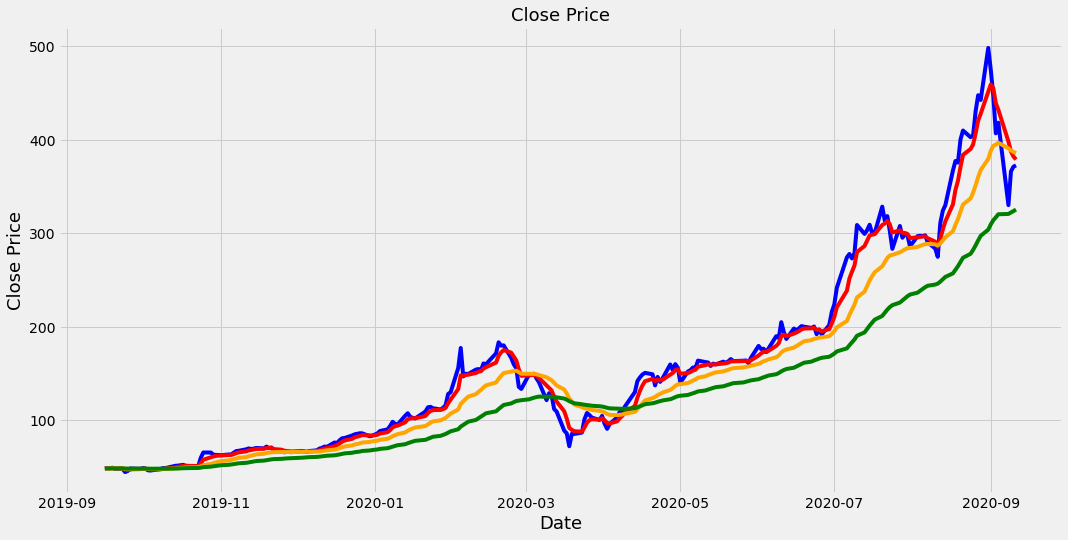

In [7]:
# visuallize the close price with EMAs
plt.figure(figsize=(16,8))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(shortEMA, label='Fast EMA', color='red')
plt.plot(middleEMA, label='Middle EMA', color='orange')
plt.plot(longEMA, label='Long EMA', color='green')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [8]:
# add the EMAs to the data set
df['Short'] = shortEMA
df['Middle'] = middleEMA
df['Long'] = longEMA

df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500,48.562000,48.562000,48.562000
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000,48.694000,48.598000,48.574984
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000,48.695334,48.607091,48.579017
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000,48.903556,48.671901,48.603312
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000,48.643704,48.622092,48.587596


In [9]:
# the function that determines to buy or sell stock
def buy_sell_function(data):

    buy = []
    sell = []
    flag_long = False
    flag_short = False

    for i in range(0, len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False:
            buy.append(data['Close'][i])
            sell.append(np.nan)
            flag_short = True 
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell.append(data['Close'][i])
            buy.append(np.nan)
            flag_short = False 
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False:
            buy.append(data['Close'][i])
            sell.append(np.nan)
            flag_long = True 
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell.append(data['Close'][i])
            buy.append(np.nan)
            flag_long = False 
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    
    return (buy, sell)

In [10]:
# add the buy and sell signals to the data set
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

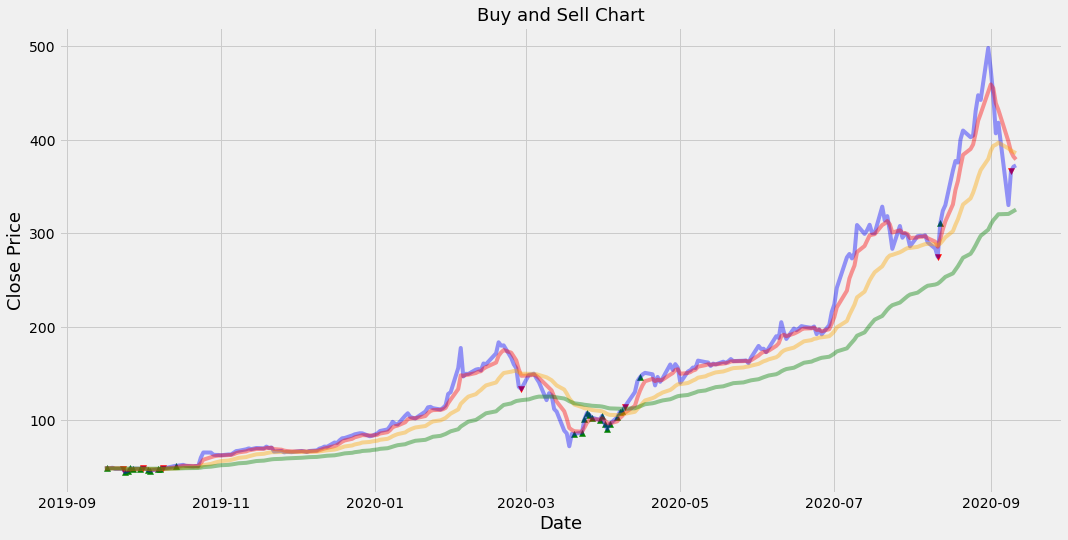

In [11]:
# visually show the buy and sell signals
plt.figure(figsize=(16,8))
plt.title('Buy and Sell Chart', fontsize=18)
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.4)
plt.plot(shortEMA, label='Fast EMA', color='red', alpha=0.4)
plt.plot(middleEMA, label='Middle EMA', color='orange', alpha=0.4)
plt.plot(longEMA, label='Long EMA', color='green', alpha=0.4)
plt.scatter(df.index, df['Buy'], color = 'green', marker='^', alpha=1)
plt.scatter(df.index, df['Sell'], color = 'red', marker='v', alpha=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()